In [57]:
from numpy import *
from matplotlib import pyplot as plt
from enum import Enum
from IPython import display


class c(float,Enum):
    h = 6.625e-34 #J-s
    hbar = 1.054e-34 # J-s
    c = 3e10 #m-s
    eV = 1.6e-19 # J
    adot = 1e-10 # m
    m_e = 9.11e-31 # kg
    k = 1.38e-23 # m^2 kg s^-2 K^-1

    


    


In [25]:
c.h*c.c/10000/c.adot

1.9875e-17

<c.c: 30000000000.0>

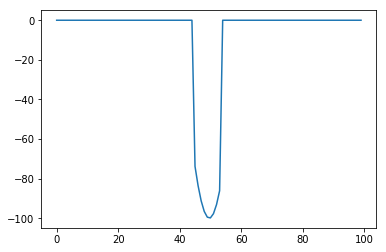

In [67]:
x = linspace(0,99,100)
t = linspace(0,99,100)
#def I(u): return 1 if 45<u<55 else 0
def I(u): return 100*sin(u/2/pi) if 45<u<55 else 0



u = x*0
u_1 = x*0
u_2 = x*0
# Given mesh points as arrays x and t (x[i], t[n])
c=1
dx = x[1] - x[0]
dt = t[1] - t[0]
C = c*dt/dx            # Courant number
Nt = len(t)-1
Nx = len(x)-1
C2 = C**2              # Help variable in the scheme

# Set initial condition u(x,0) = I(x)
for i in range(0, Nx+1):
    u_1[i] = I(x[i])

# Apply special formula for first step, incorporating du/dt=0
for i in range(1, Nx):
    u[i] = u_1[i] + 0.5*C**2*(u_1[i+1] - 2*u_1[i] + u_1[i-1])
u[0] = 0;  u[Nx] = 0   # Enforce boundary conditions

# Switch variables before next step
u_2[:], u_1[:] = u_1, u

for n in range(1, Nt):
    # Update all inner mesh points at time t[n+1]
    for i in range(1, Nx):
        u[i] = 2*u_1[i] - u_2[i] + C**2*(u_1[i+1] - 2*u_1[i] + u_1[i-1])

    # Insert boundary conditions
    u[0] = 0;  u[Nx] = 0

    # Switch variables before next step
    u_2[:], u_1[:] = u_1, u
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.plot(x, u)
    plt.show()

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

c:\dev\tools\python3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
